In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1.5)
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

In [83]:
da = pd.read_csv('data/대전광역시 서구.csv', encoding='cp949')
se = pd.read_csv('data/세종특별자치시.csv', encoding='cp949')
ch = pd.read_csv('data/충청남도 천안시.csv', encoding='cp949')

kp20 = pd.read_csv('data/kp20.csv')
kp21 = pd.read_csv('data/kp21.csv')
npa20 = pd.read_csv('data/npa20.csv')
cds = pd.read_csv('data/cds.csv')
acc = pd.read_csv('data/acc.csv')

In [84]:
se.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2523 entries, 0 to 2522
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고번호        2523 non-null   int64 
 1   사고일시        2523 non-null   object
 2   요일          2523 non-null   object
 3   시군구         2523 non-null   object
 4   사고내용        2523 non-null   object
 5   사망자수        2523 non-null   int64 
 6   중상자수        2523 non-null   int64 
 7   경상자수        2523 non-null   int64 
 8   부상신고자수      2523 non-null   int64 
 9   사고유형        2523 non-null   object
 10  법규위반        2523 non-null   object
 11  노면상태        2523 non-null   object
 12  기상상태        2523 non-null   object
 13  도로형태        2523 non-null   object
 14  가해운전자 차종    2523 non-null   object
 15  가해운전자 성별    2523 non-null   object
 16  가해운전자 연령    2523 non-null   object
 17  가해운전자 상해정도  2523 non-null   object
 18  피해운전자 차종    2421 non-null   object
 19  피해운전자 성별    2421 non-null   object
 20  피해운전자 연령

In [85]:
se.head(1)

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2019010100100213,2019년 1월 1일 15시,화요일,세종특별자치시 세종특별자치시 가람동,경상사고,0,0,1,0,차대사람 - 횡단중,...,맑음,단일로 - 기타,화물,남,31세,상해없음,보행자,여,22세,경상


In [86]:
se['동'] = se['시군구'].str.slice(8,20)
se['동'] = se['동'].str.replace('세종특별자치시', '')
se['동'] = se['동'].str.strip()

In [87]:
se['동'].value_counts()

조치원읍    430
어진동     167
나성동     155
연기면     129
금남면     127
고운동     125
종촌동     112
도담동     111
다정동     104
대평동     101
아름동     101
연서면      99
보람동      92
새롬동      88
소담동      83
부강면      80
장군면      68
전의면      68
연동면      63
소정면      48
반곡동      48
한솔동      39
전동면      37
가람동      28
집현동       8
해밀동       7
산울동       5
Name: 동, dtype: int64

In [88]:
se['사고일시'] = pd.to_datetime(se['사고일시'], format='%Y년 %m월 %d일 %H시')
se['사고일시_시간'] = se['사고일시'].dt.hour

In [89]:
se_jo = se[se['동'] == '조치원읍']

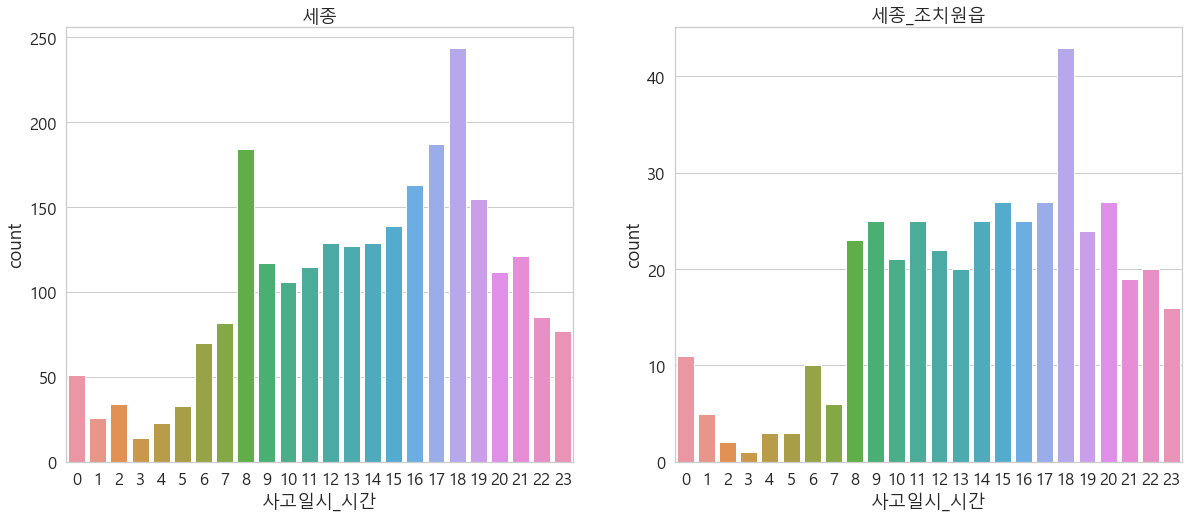

In [90]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('세종')
sns.countplot(x='사고일시_시간', data=se);

plt.subplot(1,2,2)
plt.title('세종_조치원읍')
sns.countplot(x='사고일시_시간', data=se_jo);

In [92]:
se['피해운전자 연령'].unique()

array(['22세', '33세', nan, '64세', '69세', '43세', '20세', '25세', '18세', '65세',
       '51세', '56세', '32세', '70세', '40세', '55세', '24세', '39세', '41세',
       '37세', '50세', '36세', '30세', '38세', '23세', '49세', '46세', '62세',
       '60세', '63세', '31세', '59세', '26세', '9세', '54세', '48세', '45세',
       '73세', '42세', '44세', '52세', '34세', '57세', '35세', '29세', '58세',
       '7세', '80세', '19세', '67세', '71세', '66세', '11세', '10세', '61세',
       '68세', '74세', '27세', '47세', '13세', '53세', '16세', '21세', '76세',
       '81세', '72세', '15세', '83세', '28세', '78세', '2세', '77세', '79세', '6세',
       '87세', '17세', '88세', '14세', '84세', '12세', '85세', '86세', '8세', '5세',
       '75세', '3세', '82세', '98세 이상', '1세'], dtype=object)

In [93]:
se['가해운전자 연령'] = se['가해운전자 연령'].str.replace('세 이상', '')
se['가해운전자 연령'] = se['가해운전자 연령'].str.replace('세','')
se[se['가해운전자 연령'] == '미분류'] = np.nan
se['가해운전자 연령'] = se['가해운전자 연령'].astype('float')

In [94]:
se['피해운전자 연령'] = se['피해운전자 연령'].str.replace('세 이상', '')
se['피해운전자 연령'] = se['피해운전자 연령'].str.replace('세','')

se['피해운전자 연령'] = se['피해운전자 연령'].astype('float')

In [95]:
se['가해운전자 연령'] = se['가해운전자 연령'].clip(lower=20)
se['피해운전자 연령'] = se['피해운전자 연령'].clip(lower=20)

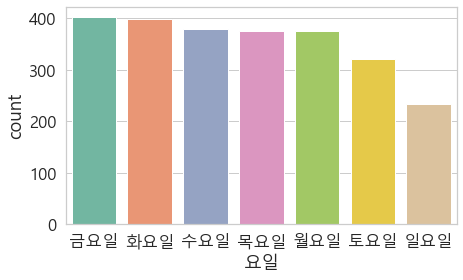

In [96]:
plt.figure(figsize=(7,4))
sns.countplot(x='요일', data=se, order=se['요일'].value_counts().index);

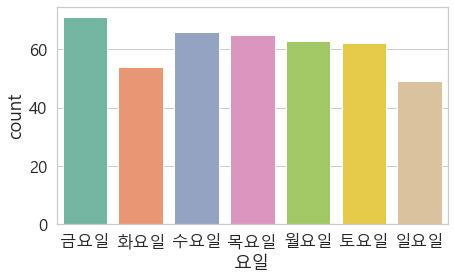

In [97]:
plt.figure(figsize=(7,4))
sns.countplot(x='요일', data=se_jo, order=se['요일'].value_counts().index);

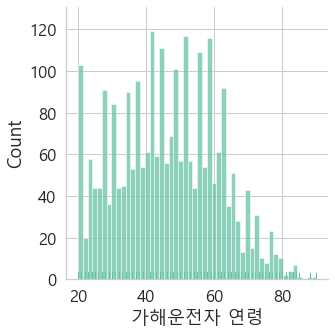

In [98]:
sns.displot(x='가해운전자 연령', kind='hist', rug=True, bins=50, height=5, data=se);

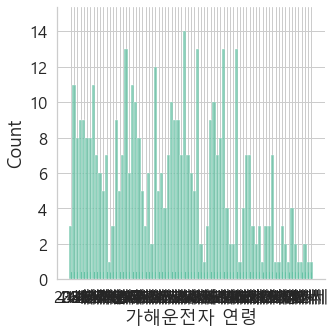

In [99]:
sns.displot(x='가해운전자 연령', kind='hist', rug=True, bins=50, height=5, data=se_jo);

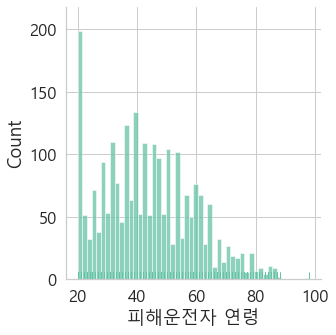

In [100]:
sns.displot(x='피해운전자 연령', kind='hist', rug=True, bins=50, height=5, data=se);

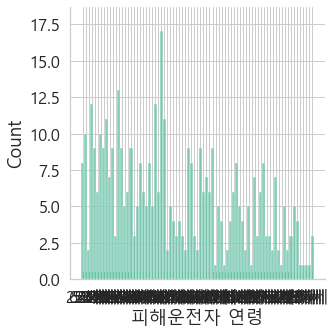

In [101]:
sns.displot(x='피해운전자 연령', kind='hist', rug=True, bins=50, height=5, data=se_jo);

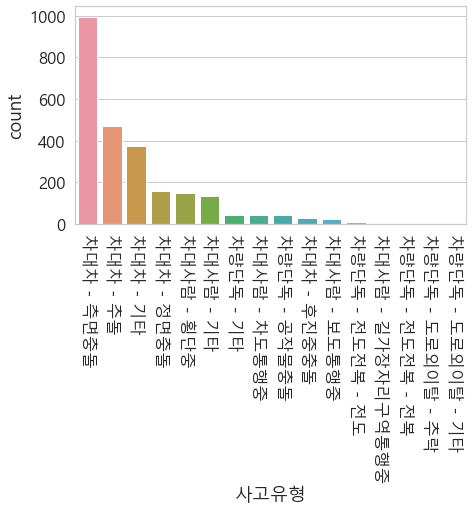

In [102]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=-90)
sns.countplot(x='사고유형', data=se, order=se['사고유형'].value_counts().index);

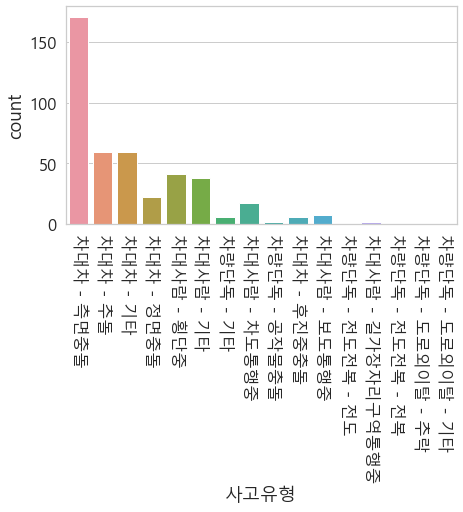

In [103]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=-90)
sns.countplot(x='사고유형', data=se_jo, order=se['사고유형'].value_counts().index);

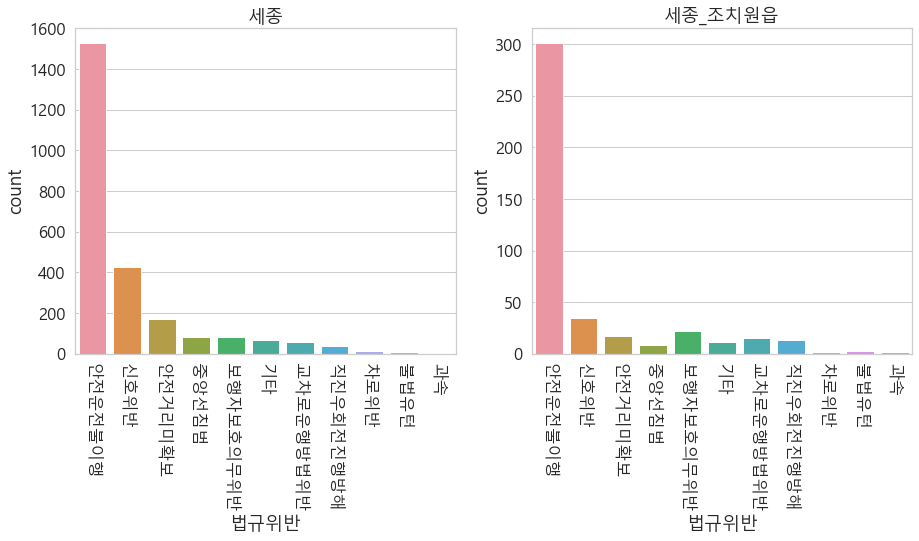

In [104]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.xticks(rotation=-90)
plt.title('세종')
sns.countplot(x='법규위반', data=se, order=se['법규위반'].value_counts().index);

plt.subplot(1,2,2)
plt.xticks(rotation=-90)
plt.title('세종_조치원읍')
sns.countplot(x='법규위반', data=se_jo, order=se['법규위반'].value_counts().index);

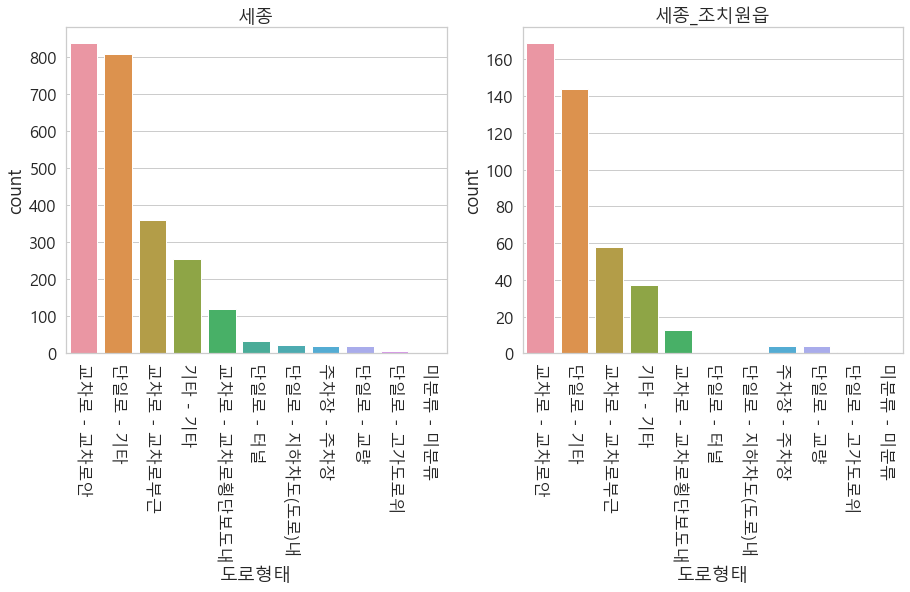

In [106]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.xticks(rotation=-90)
plt.title('세종')
sns.countplot(x='도로형태', data=se, order=se['도로형태'].value_counts().index);

plt.subplot(1,2,2)
plt.title('세종_조치원읍')
plt.xticks(rotation=-90)
sns.countplot(x='도로형태', data=se_jo, order=se['도로형태'].value_counts().index);

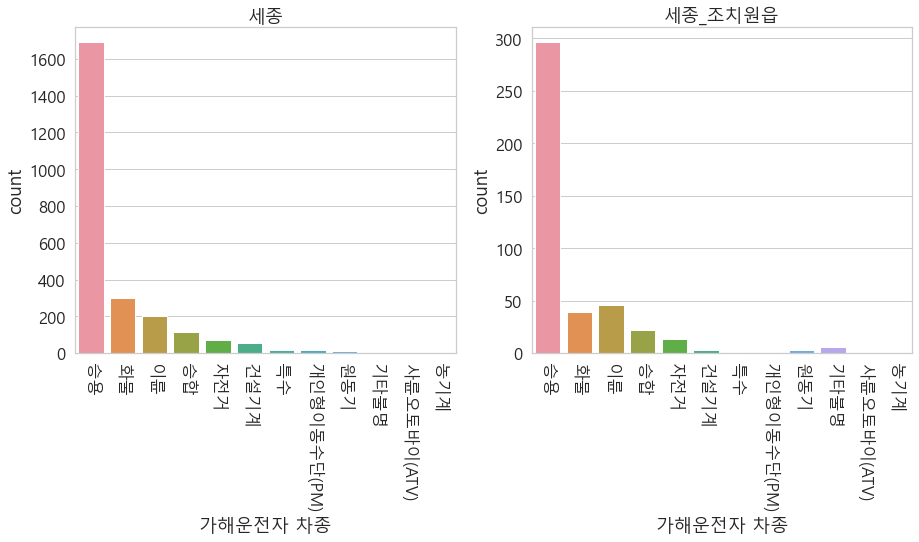

In [108]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.xticks(rotation=-90)
plt.title('세종')
sns.countplot(x='가해운전자 차종', data=se, order=se['가해운전자 차종'].value_counts().index);

plt.subplot(1,2,2)
plt.xticks(rotation=-90)
plt.title('세종_조치원읍')
sns.countplot(x='가해운전자 차종', data=se_jo, order=se['가해운전자 차종'].value_counts().index);

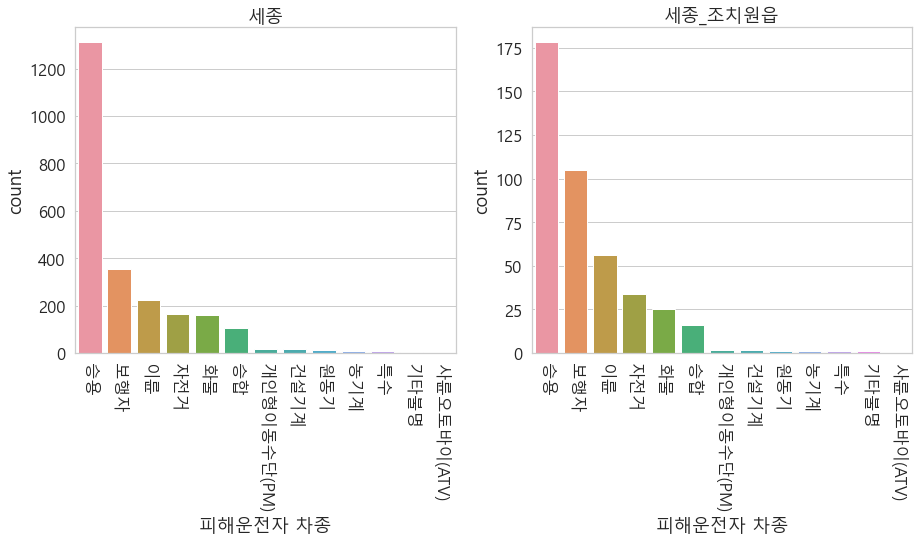

In [110]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.xticks(rotation=-90)
plt.title('세종')
sns.countplot(x='피해운전자 차종', data=se, order=se['피해운전자 차종'].value_counts().index);

plt.subplot(1,2,2)
plt.title('세종_조치원읍')
plt.xticks(rotation=-90)
sns.countplot(x='피해운전자 차종', data=se_jo, order=se['피해운전자 차종'].value_counts().index);

In [88]:
se['피해운전자 차종'].value_counts()

승용             1310
보행자             356
이륜              222
자전거             165
화물              161
승합              105
개인형이동수단(PM)      18
건설기계             16
원동기              11
농기계               8
특수                7
기타불명              4
사륜오토바이(ATV)       1
Name: 피해운전자 차종, dtype: int64

In [87]:
se_jo['피해운전자 차종'].value_counts()

승용             178
보행자            105
이륜              56
자전거             34
화물              25
승합              16
건설기계             2
개인형이동수단(PM)      2
기타불명             1
농기계              1
특수               1
원동기              1
Name: 피해운전자 차종, dtype: int64

In [ ]:
kp2021 = pd.concat([kp20,kp21], ignore_index = True)
kp2021 = kp2021.dropna(subset=['경도'])

In [ ]:
light = pd.read_csv('data/세종특별자치시_가로등_20220823.csv', encoding='cp949')
cam = pd.read_csv('data/경찰청 세종특별자치시경찰청_무인교통단속카메라_20220520.csv', encoding='cp949')
cong = pd.read_csv('data/한국도로공사_고속도로 상습정체구간_20220615.csv', encoding='cp949')
ice = pd.read_csv('data/한국도로공사_결빙취약구간 현황_20220630.csv', encoding='cp949')
traf = pd.read_csv('data/세종특별자치시_신호등_20200120_1605853978139_19178.csv', encoding='cp949')
park = pd.read_csv('data/세종시 주차장.csv', encoding='cp949')

In [ ]:
m = folium.Map(
    location=[36.603153, 127.30505],
    zoom_start=15
  #  tiles='Stamen Terrain'
)

coords = kp2021[['위도', '경도']]
marker_cluster = MarkerCluster().add_to(m)
for lat, long in zip(coords['위도'], coords['경도']):
    folium.Marker([lat, long], icon = folium.Icon(
        icon='exclamation-sign', color='red')).add_to(marker_cluster)

coords = light[['위도','경도']]
marker_cluster = MarkerCluster().add_to(m)
for lat, long in zip(coords['위도'], coords['경도']):
    folium.Marker([lat, long], icon = folium.Icon(color='orange', icon='star')).add_to(marker_cluster)
    
coords = cam[['위도','경도']]
#marker_cluster = MarkerCluster().add_to(m)
for lat, long in zip(coords['위도'], coords['경도']):
    folium.Marker([lat, long], icon = folium.Icon(color='blue', icon='facetime-video')).add_to(m)

coords = traf[['위도','경도']]
#marker_cluster = MarkerCluster().add_to(m)
for lat, long in zip(coords['위도'], coords['경도']):
    folium.Marker([lat, long], icon = folium.Icon(color='green', icon='ice-lolly')).add_to(m)    

coords = park[['위도','경도']]
#marker_cluster = MarkerCluster().add_to(m)
for lat, long in zip(coords['위도'], coords['경도']):
    folium.Marker([lat, long], icon = folium.Icon(color='purple', icon='inbox')).add_to(m)
    
folium.CircleMarker([36.603153, 127.30505],
                   color='black',
                   radius=20,
                   tooltip='상리삼거리').add_to(m)
folium.CircleMarker([36.601272, 127.298054],
                   color='black',
                   radius=20,
                   tooltip='역전교차로').add_to(m)
folium.CircleMarker([36.491155, 127.256453],
                   color='black',
                   radius=20,
                   tooltip='한누리대로').add_to(m)

In [ ]:
m.save('sejong.html')

In [ ]:
acc[acc['지점명'] == '세종특별자치시 조치원읍(상리사거리 인근)']
#36.603153, 127.30505

In [ ]:
acc[acc['지점명'] == '세종특별자치시 조치원읍(역전교차로 인근)']
#36.601272, 127.298054

In [ ]:
acc[acc['지점명'] == '세종특별자치시 다정동(한누리대로 인근)']
#36.491155, 127.256453